In [1]:
# –ò–º–ø–æ—Ä—Ç –º–æ–¥—É–ª–µ–π
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch
import cv2
from google.colab.patches import cv2_imshow

In [2]:
# –ü–æ–¥–∫–ª—é—á–µ–Ω–∏–µ –≥—É–≥–ª –¥–∏—Å–∫–∞
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# –†–∞–∑–∞—Ä—Ö–∏–≤–∏—Ä—É–µ–º –¥–∞—Ç–∞—Å–µ—Ç —Å —Ñ–æ—Ç–æ–≥—Ä–∞—Ñ–∏—è–º–∏ –º–∞—à–∏–Ω.

!unzip /content/drive/My\ Drive/dataset.zip -d /content/gdrive/My\ Drive/

Archive:  /content/drive/My Drive/dataset.zip
   creating: /content/drive/My Drive/train/
   creating: /content/drive/My Drive/train/images/
  inflating: /content/drive/My Drive/train/images/2022-09-08T15_13_50-743914_png.rf.5e0a97c91711c25ecbe47ca12a076add.jpg  
  inflating: /content/drive/My Drive/train/images/2022-09-08T15_13_50-743914_png.rf.b67f8bfcc4df30527fa2b3e7a7bea990.jpg  
  inflating: /content/drive/My Drive/train/images/2022-09-08T15_13_50-743914_png.rf.ff34bb7a54aec3136f3626d2394190b2.jpg  
  inflating: /content/drive/My Drive/train/images/2022-09-08T15_19_03-040754_png.rf.3b39c795d5c4b046ab3591b0cdb6f31c.jpg  
  inflating: /content/drive/My Drive/train/images/2022-09-08T15_19_03-040754_png.rf.91b4aa04e1787b56de799b14f45c78a9.jpg  
  inflating: /content/drive/My Drive/train/images/2022-09-08T15_19_03-040754_png.rf.a0c77e74d4728de408e36e19a198ffdf.jpg  
  inflating: /content/drive/My Drive/train/images/2022-09-08T15_19_04-566255_png.rf.1a36a13815dbc826719eed992501acd3.jpg 

In [3]:
# –ü–µ—Ä–µ—Ö–æ–¥–∏–º –≤ –ø–∞–ø–∫—É –∫—É–¥–∞ –±—É–¥–µ–º –∫–æ–ø–∏—Ä–æ–≤–∞—Ç—å –¥–∞–Ω–Ω—ã–µ —Å –≥–∏—Ç—Ö–∞–±–∞
%cd drive/MyDrive/

# –ö–æ–ø–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ —Å –≥–∏—Ç—Ö–∞–±–∞ 
!git clone https://github.com/ultralytics/yolov5

# –ü–æ—Å–ª–µ –∫–æ–ø–∏—Ä–æ–≤–∞–Ω–∏—è –ø–µ—Ä–µ—Ö–æ–¥–∏–º –≤ –ø–∞–ø–∫—É yolov5 –∏ —Å—Ç–∞–≤–∏–º —Å–ø–∏—Å–æ–∫ –±–∏–±–ª–∏–æ—Ç–µ–∫ –∏–∑ —Ñ–∞–π–ª–∞
%cd yolov5
%pip install -qr requirements.txt

/content/drive/MyDrive
Cloning into 'yolov5'...
remote: Enumerating objects: 13140, done.
remote: Counting objects: 100% (296/296), done.
remote: Compressing objects: 100% (141/141), done.
remote: Total 13140 (delta 200), reused 226 (delta 155), pack-reused 12844
Receiving objects: 100% (13140/13140), 13.17 MiB | 10.37 MiB/s, done.
Resolving deltas: 100% (9030/9030), done.
/content/drive/MyDrive/yolov5
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.6 MB 5.2 MB/s 


In [4]:
# –°—Ç–∞–≤–∏–º –±–∏–±–ª–∏–æ—Ç–µ–∫—É –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.8 MB 4.9 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 162 kB 64.6 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 181 kB 74.2 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 63 kB 2.1 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 158 kB 75.0 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 157 kB 76.3 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 157 kB 74.7 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñ

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
# –ò–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º —É—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–Ω—É—é –±–∏–±–ª–∏–æ—Ç–µ–∫—É –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏
import wandb
wandb.login(anonymous='must')

In [8]:
%cd ../yolov5

/content/drive/MyDrive/yolov5


In [10]:
# –ó–∞–¥–∞—ë–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏. –†–∞–∑–º–µ—Ä –∫–∞—Ä—Ç–∏–Ω–æ–∫ 640 –Ω–∞ 640 (—Ç–∞–∫–æ–π —Ä–∞–∑–º–µ—Ä —Ñ–æ—Ç–æ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ).
# –ë–∞—Ç—á—Å–∞–π–∑ 10, –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ø–æ—Ö 10.
# –ü—É—Ç—å –∫ yaml —Ñ–∞–π–ª—É –≥–¥–µ —É–∫–∞–∑–∞–Ω–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Å–æ–≤ –∏ –ø—É—Ç–∏ –∫ –ø–∞–ø–∫–∞–º —Å –∫–∞—Ä—Ç–∏–Ω–∫–∞–º–∏
# –°—Ç–∞—Ä—Ç–æ–≤—ã–µ –≤–µ—Å–∞ (–º–∞–ª–µ–Ω—å–∫–∞—è/—Å—Ä–µ–¥–Ω—è—è/–±–æ–ª—å—à–∞—è –º–æ–¥–µ–ª—å)

!python train.py --img 640\
--batch 10\
--epochs 10\
--data '../data.yaml'\
--weights yolov5m6.pt

wandb: Currently logged in as: anony-moose-411047. Use `wandb login --relogin` to force relogin
train: weights=yolov5m6.pt, cfg=, data=../data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=10, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ‚úÖ
YOLOv5 üöÄ v6.2-182-g1158a50 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_

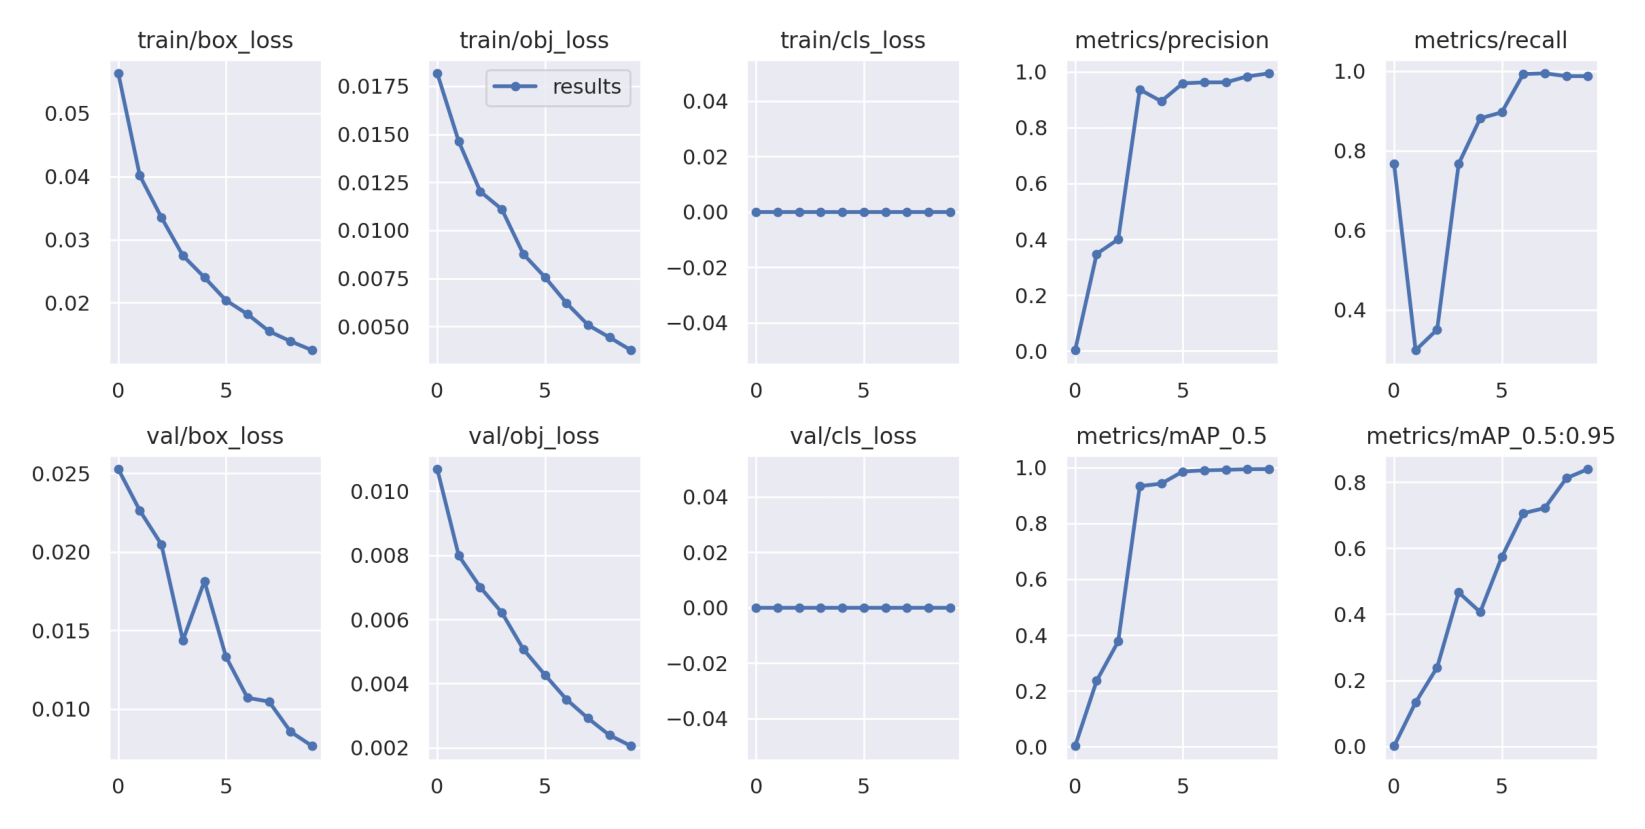

In [14]:
# –í—ã–≤–µ–¥–µ–º –≥—Ä–∞—Ñ–∏–∫–∏ –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏ –Ω–∞ 10 —ç–ø–æ—Ö–∞—Ö (—É–∫–∞–∂–µ–º –ø—É—Ç—å –∫ –∫–∞—Ä—Ç–∏–Ω–∫–µ –≤ –∫–æ—Ç–æ—Ä—É—é —Å–æ—Ö—Ä–∞–Ω—è–µ—Ç—Å—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç)
plt.figure(figsize=(30,15))
plt.axis('off')
plt.imshow(plt.imread('../yolov5/runs/train/exp/results.png'))

In [ ]:
# –ú–µ—Ç—Ä–∏–∫–∏ Precision –∏ Recall –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ –ø–æ—Å–ª–µ 5 —ç–ø–æ—Ö –ø—Ä–∏–±–ª–∏–∂–∞—é—Ç—Å—è –∫ 1. –ì—Ä–∞—Ñ–∏–∫–∏ –ª–æ—Å—Å–æ–≤ –≤—ã–≥–ª—è–¥—è—Ç —Ç–∞–∫, –±—É–¥—Ç–æ –º–æ–≥—É—Ç —Å–Ω–∏–∑–∏—Ç—å—Å—è –µ—â—ë. –ü–æ—ç—Ç–æ–º—É –ø–æ–ø—Ä–æ–±—É–µ–º –æ–±—É—á–∏—Ç—å –º–æ–¥–µ–ª—å –Ω–∞ 15 —ç–ø–æ—Ö–∞—Ö.

In [16]:
!python train.py --img 640\
--batch 10\
--epochs 15\
--data '../data.yaml'\
--weights yolov5m6.pt

wandb: Currently logged in as: anony-moose-411047. Use `wandb login --relogin` to force relogin
train: weights=yolov5m6.pt, cfg=, data=../data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=15, batch_size=10, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ‚úÖ
YOLOv5 üöÄ v6.2-182-g1158a50 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_

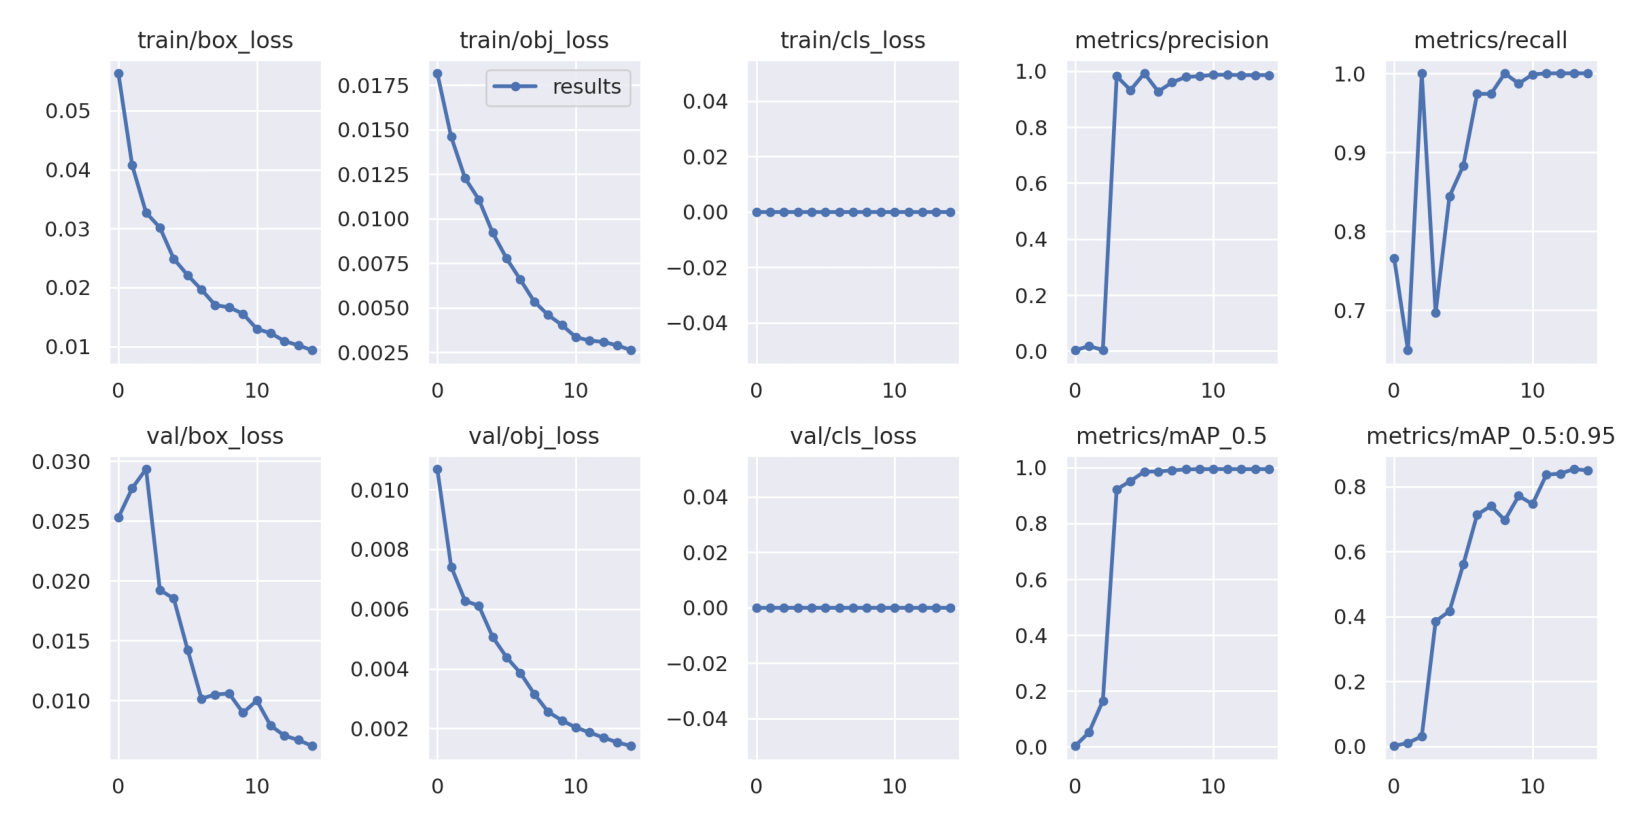

In [18]:
# –í—ã–≤–µ–¥–µ–º –≥—Ä–∞—Ñ–∏–∫–∏ –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏ –Ω–∞ 15 —ç–ø–æ—Ö–∞—Ö (—É–∫–∞–∂–µ–º –ø—É—Ç—å –∫ –∫–∞—Ä—Ç–∏–Ω–∫–µ –≤ –∫–æ—Ç–æ—Ä—É—é —Å–æ—Ö—Ä–∞–Ω—è–µ—Ç—Å—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç)
plt.figure(figsize=(30,15))
plt.axis('off')
plt.imshow(plt.imread('../yolov5/runs/train/exp2/results.png'))

In [ ]:
# –õ–æ—Å—Å—ã –ø—Ä–æ–¥–æ–ª–∂–∞—é—Ç —Å–Ω–∏–∂–∞—Ç—å—Å—è. –ù–æ –∏–∑-–∑–∞ —Å–ª—É—Ö–æ–≤ –Ω–∞ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏—è –≤ colab –ø—Ä–æ–¥–æ–ª–∂–∞—Ç—å —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—ã –Ω–µ —Ä–∏—Å–∫–Ω—É–ª.

YOLOv5 üöÄ v6.2-182-g1158a50 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 276 layers, 35248920 parameters, 0 gradients, 48.9 GFLOPs
Adding AutoShape... 


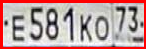

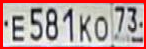

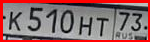

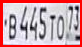

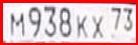

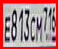

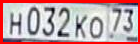

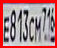

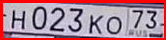

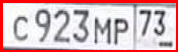

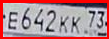

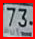

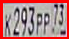

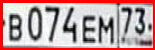

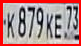

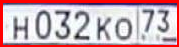

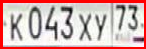

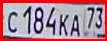

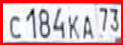

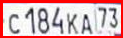

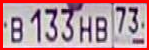

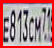

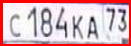

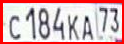

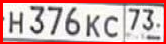

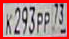

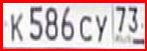

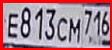

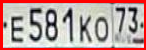

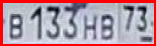

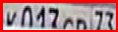

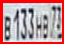

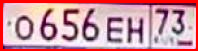

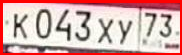

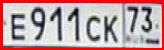

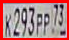

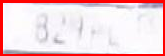

In [20]:

# –ü—É—Ç—å –∫—É–¥–∞ —Å–æ—Ö—Ä–∞–Ω—è–ª–∏—Å—å –≤–µ—Å–∞ –¥–æ–æ–±—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏ 
# –ü—É—Ç—å –∫ –ø–∞–ø–∫–µ —Å —Ñ–∞–π–ª–∞–º–∏ yolo
model_path = '../yolov5/runs/train/exp2/weights/best.pt'
yolo_path = '../yolov5'

# –ó–∞–≥—Ä—É–∑–∫–∞ –º–æ–¥–µ–ª–∏ –∏–∑ —Ç–æ—Ä—á —Ö–∞–± –∏ –∑–∞–≥—Ä—É–∑–∫–∞ –≤ –Ω–µ—ë —Ä–∞–Ω–µ–µ —Å–æ—Ö—Ä–∞–Ω—ë–Ω–Ω—ã—Ö –≤–µ—Å–æ–≤
model_yolo = torch.hub.load(yolo_path, 'custom', path=model_path, source='local')


# –§—É–Ω–∫—Ü–∏—è –Ω—É–∂–Ω–∞ –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –∏–∑ yolo5 –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–æ–≤ –±–∞—É–Ω–¥–∏–Ω–≥ –±–æ–∫—Å–∞ —Ä–∞–º–∫–∏ —Å –Ω–æ–º–µ—Ä–æ–º –ø–æ –∫–∞–∂–¥–æ–π –∫–∞—Ä—Ç–∏–Ω–∫–µ. –ü—Ä–∏–Ω–∏–º–∞–µ—Ç –Ω–∞ –≤—Ö–æ–¥ –ø—É—Ç—å –∫ –∫–∞—Ä—Ç–∏–Ω–∫–µ. –í—ã–¥–∞–µ—Ç –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã —Ä–∞–º–∫–∏ –∏ –∫–∞—Ä—Ç–∏–Ω–∫—É
def get_bboxes(path_to_img):

  image = cv2.imread(path_to_img)
  results = model_yolo([image])

  plates = []
  if results.xyxy[0].shape[0] == 0:
    pass
  else:
    number_of_license_plate = results.xyxy[0].shape[0]
    
    for i in range(0, number_of_license_plate):
      xmin = results.xyxy[0][i][0]
      ymin = results.xyxy[0][i][1]
      xmax = results.xyxy[0][i][2]
      ymax = results.xyxy[0][i][3]
      confidence = results.xyxy[0][i][4]
      plates.append((xmin, ymin, xmax, ymax, confidence))
  return plates, image


# –§—É–Ω–∫—Ü–∏—è –Ω—É–∂–Ω–∞ –¥–ª—è –æ—Ç—Ä–∏—Å–æ–≤–∫–∏ —Ä–∞–º–∫–∏ —Å –Ω–∞–π–¥–µ–Ω–Ω—ã–º –≥–æ—Å. –Ω–æ–º–µ—Ä–æ–º –Ω–æ–º–µ—Ä–æ–º.
# –ü—Ä–∏–Ω–∏–º–∞–µ—Ç –Ω–∞ –≤—Ö–æ–¥ —Å–ø–∏—Å–æ–∫ –±–∞—É–Ω–¥–∏–Ω–≥ –±–æ–∫—Å–æ–≤, –∫–∞—Ä—Ç–∏–Ω–∫—É –∏ –ø–æ—Ä–æ–≥ —É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç–∏
def draw_bboxes(boxes_list, frame, conf = 0.4):
  if len(boxes_list) == 0:
    plate_number = None
        
  else:
    # –û—Ç—Ä–∏—Å–æ–≤—ã–≤–∞–µ–º —Ä–∞–º–∫—É —Å –Ω–æ–º–µ—Ä–æ–º, –µ—Å–ª–∏ —É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç—å –≤—ã—à–µ –ø–æ—Ä–æ–≥–æ–≤–æ–π 
    for box in boxes_list:
      if box[4] >= conf:
        cv2.rectangle(frame, (int(box[0]), int(box[1])), (int(box[0]) + (int(box[2])-int(box[0])), int(box[1]) + (int(box[3])-int(box[1]))), (0, 0, 255), 3)
        cv2.putText(frame, str(round(float(box[4]),2)) , (int(box[0]), int(box[1])-10), cv2.FONT_HERSHEY_DUPLEX, 0.5, (0, 0, 255),lineType=cv2.LINE_AA)
        plate_number = frame[int(box[1]): int(box[1]) + (int(box[3])-int(box[1])), int(box[0]): int(box[0]) + (int(box[2])-int(box[0]))]
        #clear_output(wait=True)
        cv2_imshow(plate_number)

      else:
        pass
           



# –ü—É—Ç—å –∫ —Ç–µ—Å—Ç–æ–≤–æ–π –∫–∞—Ä—Ç–∏–Ω–∫–µ
img_path = '../test/images/'
test_images = os.listdir(img_path)


# –í—ã–≤–µ–¥–µ–º —Ä–∞–º–∫–∏ —Å –Ω–æ–º–µ—Ä–∞–º–∏ –ø–æ –∫–∞–∂–¥–æ–π –∫–∞—Ä—Ç–∏–Ω–∫–µ –∏–∑ —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö. –ü–æ—Å–º–æ—Ç—Ä–∏–º, –Ω–∞—à–ª–∞ –ª–∏ –æ–±–ª–∞—Å—Ç—å —Å –Ω–æ–º–µ—Ä–æ–º –º–æ–¥–µ–ª—å.
for img in test_images:
  bboxes, img = get_bboxes(img_path+img)
  draw_bboxes(bboxes, img)


In [ ]:
# –í–∏–¥–∏–º, —á—Ç–æ –º–æ–¥–µ–ª—å –Ω–∞—Ö–æ–¥–∏—Ç –æ–±–ª–∞—Å—Ç—å —Å –Ω–æ–º–µ—Ä–æ–º. –î–ª—è –±–æ–ª—å—à–µ–π –Ω–∞–≥–ª—è–¥–Ω–æ—Å—Ç–∏ –≤ –¥—Ä—É–≥–æ–º –Ω–æ—É—Ç–±—É–∫–µ –ø–æ–¥–∫–ª—é—á–∏–º –∫ –º–æ–¥–µ–ª–∏ –≤–∏–¥–µ–æ—Ñ–∞–π–ª –∏ —Å–æ—Ö—Ä–∞–Ω–∏–º –æ—Ç—Ä–∏—Å–æ–≤—ã–Ω–Ω—É—é —Ä–∞–º–∫—É —Å –Ω–æ–º–µ—Ä–æ–º –≤ –¥—Ä—É–≥–æ–π –≤–∏–¥–µ–æ —Ñ–∞–π–ª. 